# Module 1, Lesson 1: Random number generator

See slides for background information about
  * Stochastic simulation
  * uniform distribution
  * hardware random number generators
  * pseudo-random numbers
  * Random number seed


<!-- ![alt](https://www.astroml.org/_images/fig_uniform_distribution_1.png) -->

## Uniform distribution

The uniform distribution is a rectangular and symmetrical distribution bound by two arbitrary numbers $a$ and $b$. This distribution is often denoted as $U(a,b)$. For the purposes of this module, we will be focussing on the uniform distribution bound between 0 and 1, denoted as $U(0,1)$. The mean of  $U(0,1)$ is defined as $(\frac{1}{2})$ and the variance is defined as $(\frac{1}{12})$.


<!-- ![alt](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/500px-Uniform_Distribution_PDF_SVG.svg.png) -->
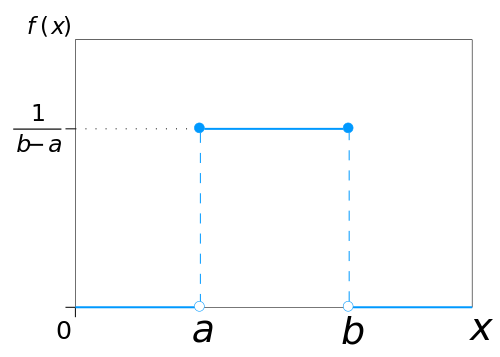




## Pseudo-random number generator


Random variables from the uniform distribution $U(0,1)$ are called _random numbers_ (i.e. the _random number_ $u$ drawn from the. uniform distribution is denoted as $u ~ U(0,1)$). A _pseudo-random number generator_ is a deterministic mathematical method to generate a sequence of numbers between 0 and 1 that appear to be random. The numbers are not truely random, however, because they are generated via a deterministic process.

### Multiplication-congruential method

The _multiplication-congruential method_ is one approach to generate a sequence of numbers between 0 and 1.
$$ A_{i} = cA_{i-1} mod M $$

In this equation, $A_{i}$, $c$, and $M$ are all positive integers. The multiplier is $c$, the remainder when $a$ is divided by M is a mod M (in python this would be ```a%M```), the position or index in the sequence is denoted by $i$. Thus, the initial value would be $A_{0}$, and is referred to as the _seed_.

$$ui = \frac{A_{i}}{M}$$

Dividing $A_{i}$ by $M$ will produce a number between 0 and 1, denoted as $u_{i}$.

First we'll start with the modulus ($M$) of 10,000, a multiplier ($c$) of 13, and an initial seed $A_{0}$ of 123 to calculate $u_{1}$

In [2]:

M = 10000 # modulus
c = 13 # increment
A0 = 123 
u0 = A0/M
A1 = ((c*A0)%M)
u1 = A1/M
print(A1,u1)



1599 0.1599


Next, we'll use a for loop to print $u_{i}$ for values of $i$ up to 9.


<!-- $${\displaystyle X_{n+1}=\left(aX_{n}+c\right){\bmod {m}}}{\displaystyle X_{n+1}=\left(aX_{n}+c\right){\bmod {m}}}$$
 -->


In [5]:
A0 = 123
Ai = A0
for i in range(1,10):
    Ai = (c * Ai)%M
    ui = Ai / M
    print("i:",i,"ui:",ui)
#     A.append(Ai)
# print([Ai/M for Ai in A])

i: 1 ui: 0.1599
i: 2 ui: 0.0787
i: 3 ui: 0.0231
i: 4 ui: 0.3003
i: 5 ui: 0.9039
i: 6 ui: 0.7507
i: 7 ui: 0.7591
i: 8 ui: 0.8683
i: 9 ui: 0.2879


## Worked exercise
1. Make a function to construct array u of length N given c = 13,A0 = 123, M = 10000

In [6]:
def multCongN(c,A0,M,N):
    A = [A0]
    u = [A0/M]
    for i in range(1,N):
        Ai = (c * A[i-1])%M
        ui = Ai/M
        A.append(Ai)
        u.append(ui)
    return u
print(multCongN(13,123,10000,10))


[0.0123, 0.1599, 0.0787, 0.0231, 0.3003, 0.9039, 0.7507, 0.7591, 0.8683, 0.2879]


### Exercise on your own: test the randomness

The numbers generated by ```multCongN``` appear random, but after a certain point they would start to repeat themselves. You can play around with various values of $c$, $A_{0}$, and $M$ to see how the sequence changes. To test how seemingly random these numbers are you can do three things.

1. Make sure the mean is approximately $(\frac{1}{2})$
    * Convert list to numpy array ```np.array(name_of_list)```
    * Calculate mean ```np.mean(np.array(name_of_list))```
2. Make sure the variance is approximately $(\frac{1}{12})$
    * Calculate variance ```np.var(np.array(name_of_list))```
3. Make sure the values are not auto correlated. $R^2$ is approximately 0.
    * i.e the first 30 values shouldn't be correlated with the next 30 using the function ```calcRsquared```
    

In [7]:
import numpy as np

def calcRsquared(list1,list2):
    
    correlation_matrix = np.corrcoef(list1, list2)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared

sixty_u = multCongN(13,123,10000,60)
sixty_u_np = np.array(sixty_u)

sixty_u_first30 = sixty_u[:30]
sixty_u_lastst30 = sixty_u[30:]

print("mean:", np.mean(sixty_u_np))
print("variance:", np.var(sixty_u_np))
print("r-squared:", calcRsquared(sixty_u_first30,sixty_u_lastst30))

mean: 0.5218333333333333
variance: 0.07792428888888889
r-squared: 0.04627776896137083


## random number seed and built in random number generators

Luckily, python has already done the hard work of constructing a pseudo-random number generator that does an excellent job of generating numbers that are as seemingly random as possible using the ```random.random()``` function. The seed for this function is typically the number of seconds that has passed since 00:00:00, 1, January 1970. For purposes of reproducibility, when conducting a simulation it is often nice to use the same seed, this can be done by setting ```random.seed(n)``` to any positive integer n that you wish so that when someone else runs your program, they will have the same outcome.

In [1]:
import random
random.random()
# play around with seed

0.8308161108852922